In [98]:
# <center>Предсказание цены велосипеда.</center>
## <center>Часть 1. Разведочный анализ данных</center>

Рассмотрим датасет велосипедов, который можно скачать [тут](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset).

Описание датасета:
The columns in the given dataset are as follows:

- name
- selling price
- year
- seller type
- owner
- km driven
- ex showroom price


Необходимо решить задачу классификации и научиться предсказывать целовой признак **?** выживет ли пассажир по его нецелевым признакам.

Сперва подключим необходимые библиотеки.

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [100]:
df = pd.read_csv('./bike_details.csv')

In [101]:
df.count()

name                 1061
selling_price        1061
year                 1061
seller_type          1061
owner                1061
km_driven            1061
ex_showroom_price     626
dtype: int64

In [102]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Проверяем общее количество пропущенных значений.

In [103]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Признак **ex_showroom_price** и **Embarked** имеет пропущенные значения. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [104]:
df['selling_price'].value_counts()

25000    77
35000    66
50000    63
40000    63
30000    62
         ..
39000     1
83299     1
14700     1
19000     1
31000     1
Name: selling_price, Length: 130, dtype: int64

Признак selling_price -- количественный, поэтому используем для его анализа ящик с усами.

<AxesSubplot: xlabel='selling_price'>

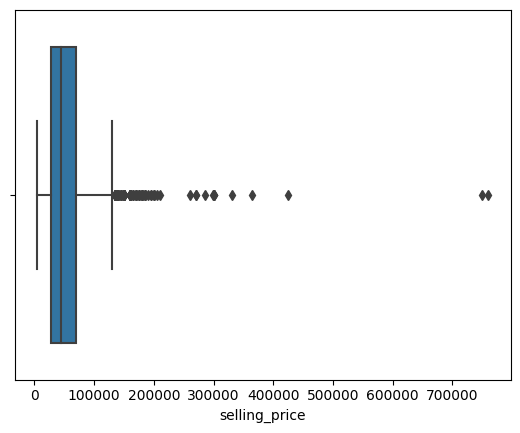

In [105]:
sns.boxplot(x=df['selling_price'])

Из графика видно, что у нас есть некоторые выбросы, которые мешают анализу. Уберем эти выбросы.

<AxesSubplot: xlabel='selling_price'>

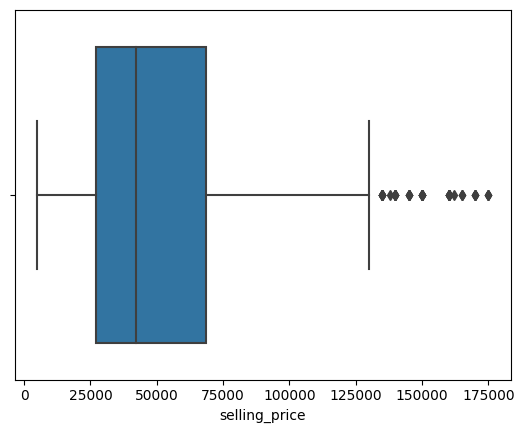

In [106]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
sns.boxplot(x=df_2['selling_price'])

Посмотрим, какое среднее значение цены было у велосипеда.

In [107]:
df['selling_price'].mean()

59638.1517

Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

Признак Name содержит слишком много уникальных значений, хотя в названии каждого велосипеда как правило присутствует бренд. На основе признака Name cформируем новый признак Brand, а признак Name выкинем. 

In [108]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [109]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [110]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

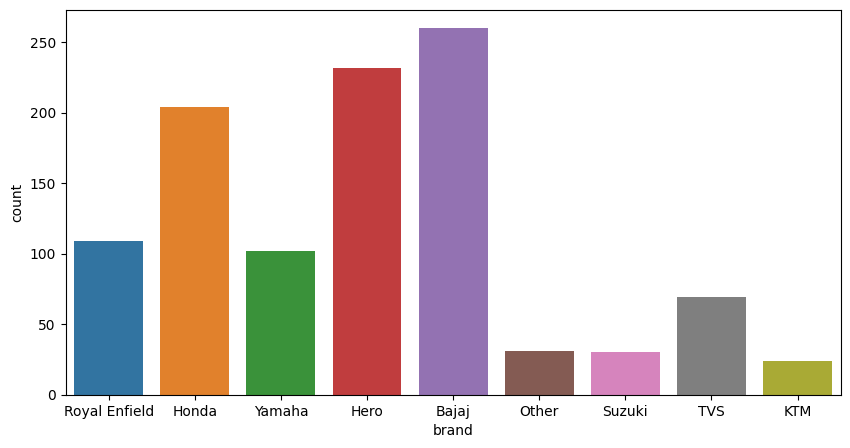

In [111]:
df['brand'] = df['name'].apply(lambda x: brand(x))
sns.countplot(x=df['brand'])
fig = plt.gcf()
fig.set_size_inches(10, 5)

Как видно, создание нового признака brand было уместным --- к категории Other относится совсем немного велосипедов. Можно будет удалить признак name.

### Количественный признак Year

(array([  2.,   1.,   3.,  10.,   6.,  68., 116., 204., 298., 353.]),
 array([1988. , 1991.2, 1994.4, 1997.6, 2000.8, 2004. , 2007.2, 2010.4,
        2013.6, 2016.8, 2020. ]),
 <BarContainer object of 10 artists>)

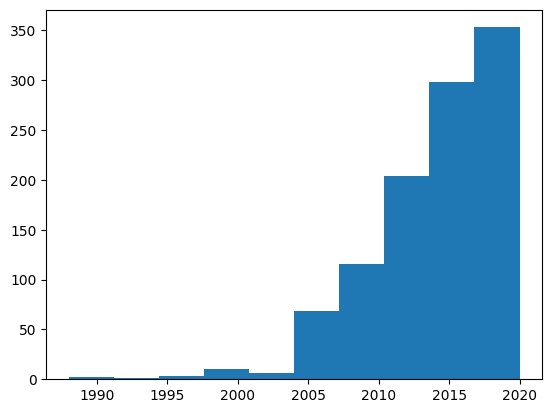

In [112]:
plt.hist(x=df['year'])

<AxesSubplot: xlabel='year'>

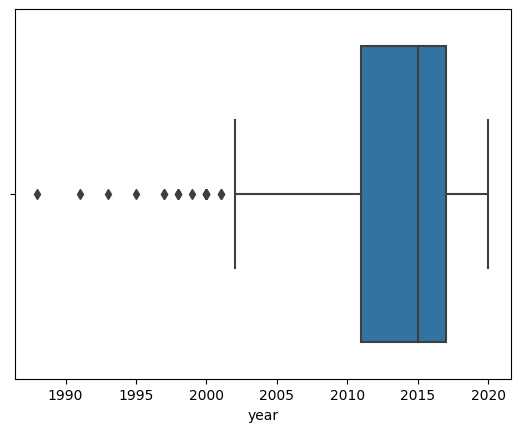

In [113]:
sns.boxplot(x=df['year'])

## Количественный признак km_driven

(array([1.022e+03, 2.900e+01, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.50000e+02, 8.83150e+04, 1.76280e+05, 2.64245e+05, 3.52210e+05,
        4.40175e+05, 5.28140e+05, 6.16105e+05, 7.04070e+05, 7.92035e+05,
        8.80000e+05]),
 <BarContainer object of 10 artists>)

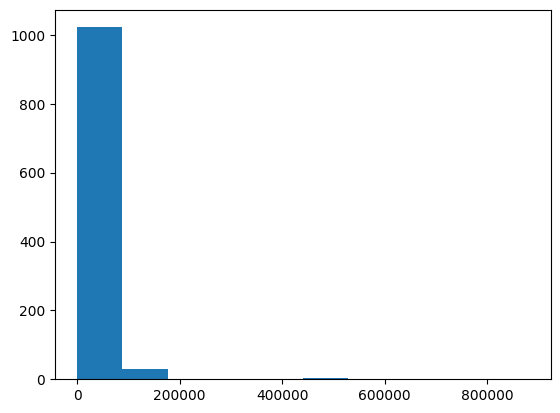

In [114]:
plt.hist(x=df['km_driven'])

Большинство велосипедов имеет пробег до 200000км.

### Категориальный признак seller_type

<AxesSubplot: xlabel='seller_type', ylabel='count'>

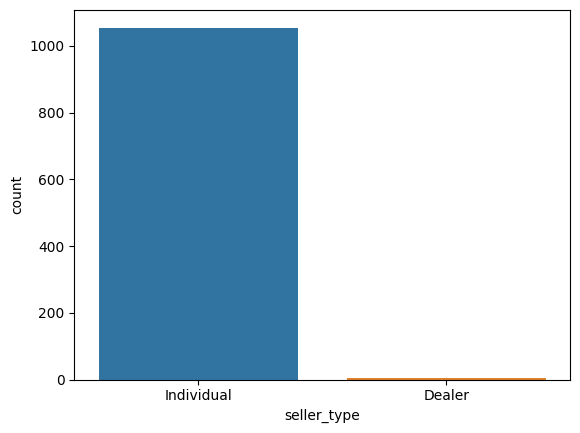

In [115]:
sns.countplot(x=df['seller_type'])

Подавляющее большинство велосипедов продается частными лицами, поэтому перед обучением удалим этот признак.

### Категориальный признак owner

<AxesSubplot: xlabel='owner', ylabel='count'>

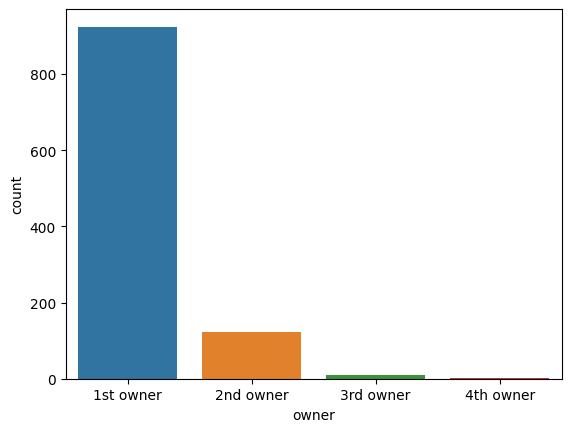

In [116]:
sns.countplot(x=df['owner'])

Большинство велосипедов имели только одного владельца.

### Двумерный анализ признаков

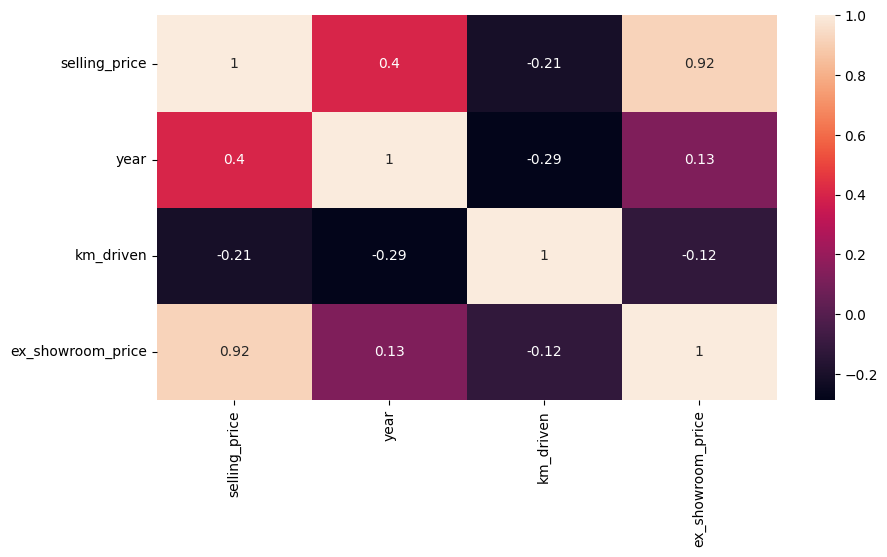

In [117]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Из карты признаков видна высокая корелляция признаков selling_price и ex_showroom_price. Так как признак ex_showroom_price имеет пропущенные значения, кажется целесообразным убрать его в процессе чистки. Еще из карты видна кажущаяся естественной корелляция километров пробега (km_driven) и возраста велосипеда (year) --- чем больше лет велосипеду, тем больше на нем проездили.

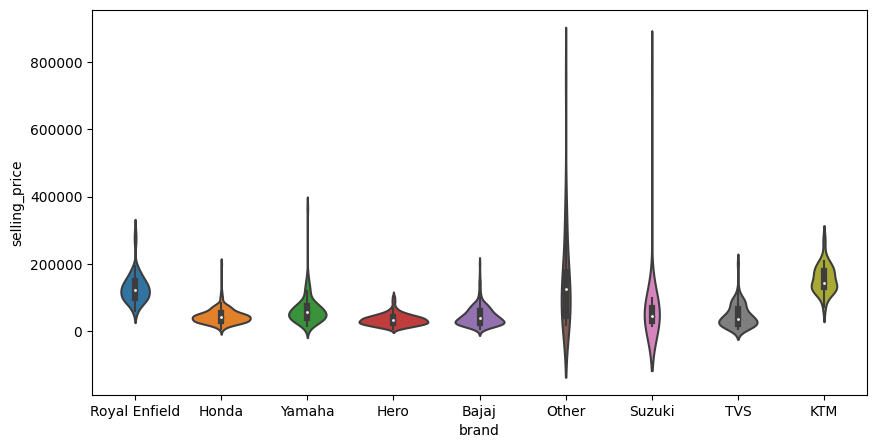

In [118]:
sns.violinplot(data=df,x="brand", y="selling_price", split=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)

Из графика с виолончелями можно сделать вывод, что наименьший разброс по цене имеют велосипеды марки Hero. При этом, например, велосипеды марки KTM в целом дороже велосипедов марки Hero.

Так как вместо признака name мы ввели признак brand, а ex_showroom_price имеет высокую корелляцию с selling_price и большое количество пропущенных значений, их можно удалить. Так как мы собираемся предсказывать значения признака selling_price, его мы тоже удалим. Разобьем датасет на тестовую и обучающую выборки, используя существующие методы. Также трансформируем категориальные признаки owner, seller_type, brand с помощью метода get_dummies в наборы соответствующих колонок с булевыми значениями.

In [119]:
df = pd.get_dummies(df, columns = ['owner', 'brand'], drop_first = True)
df = df.drop(columns=["name","ex_showroom_price"])
df.shape

(1061, 15)

In [120]:
from sklearn.model_selection import train_test_split

y = df["selling_price"]
X = df.drop(columns=["selling_price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

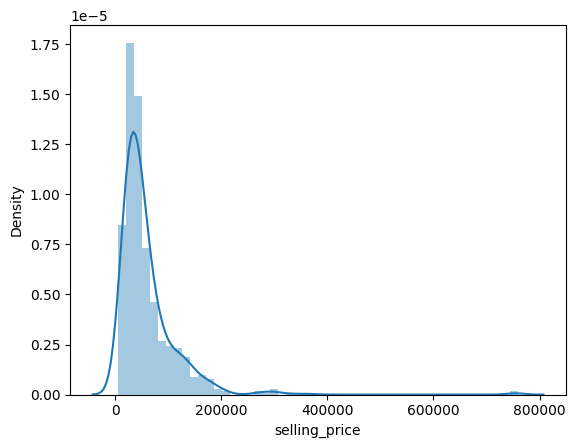

In [121]:
sns.distplot(y_train);

In [122]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

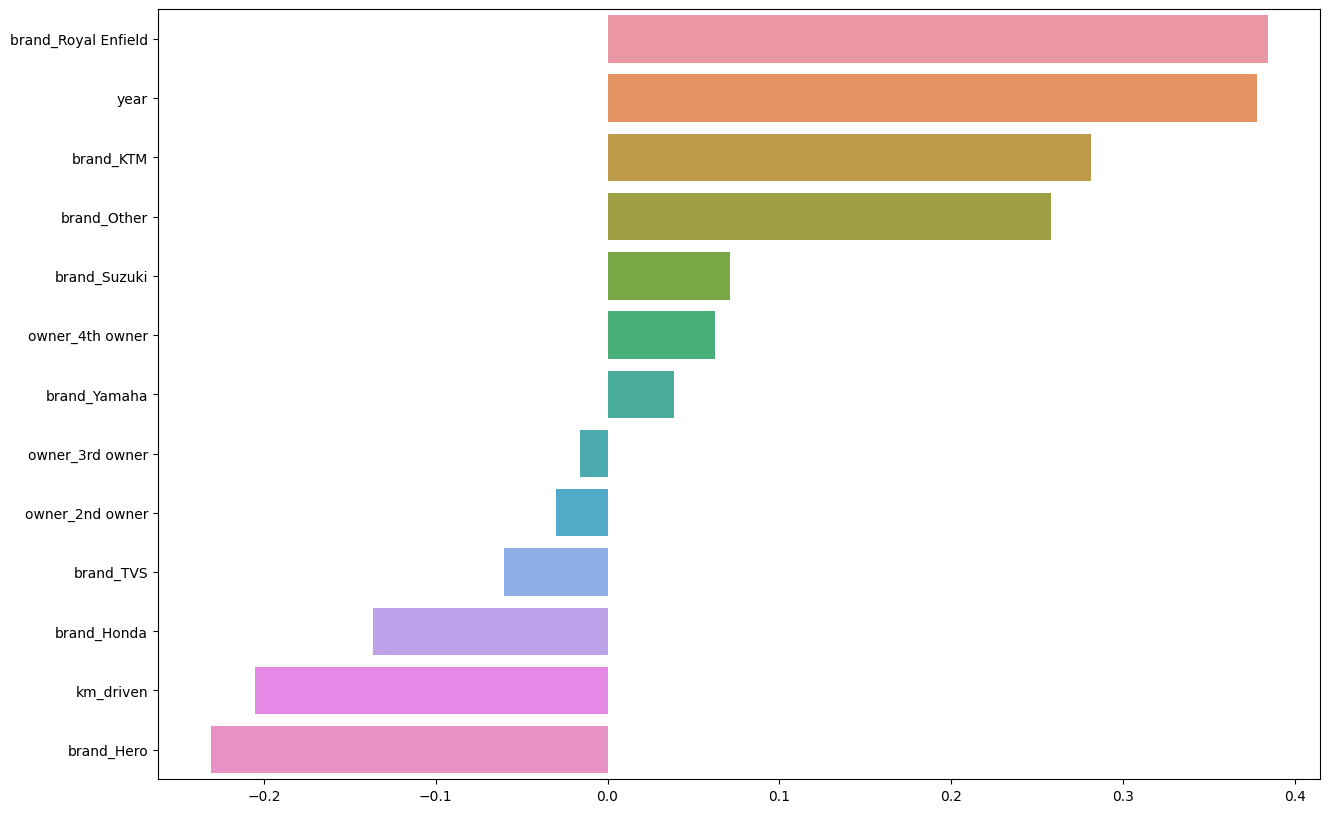

In [123]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [124]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 31914.134910215296
Train RMSE = 44174.87207580952


In [125]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 30823.5652
	25739.5319
	28388.6948
	24258.4514
	90826.7236
Mean CV MSE = 40007.3934


In [126]:
stupid_pred = y_train.mean()
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with stupid predictor = 48823.30740863682
Train RMSE with stupid predictor = 59197.72942156131


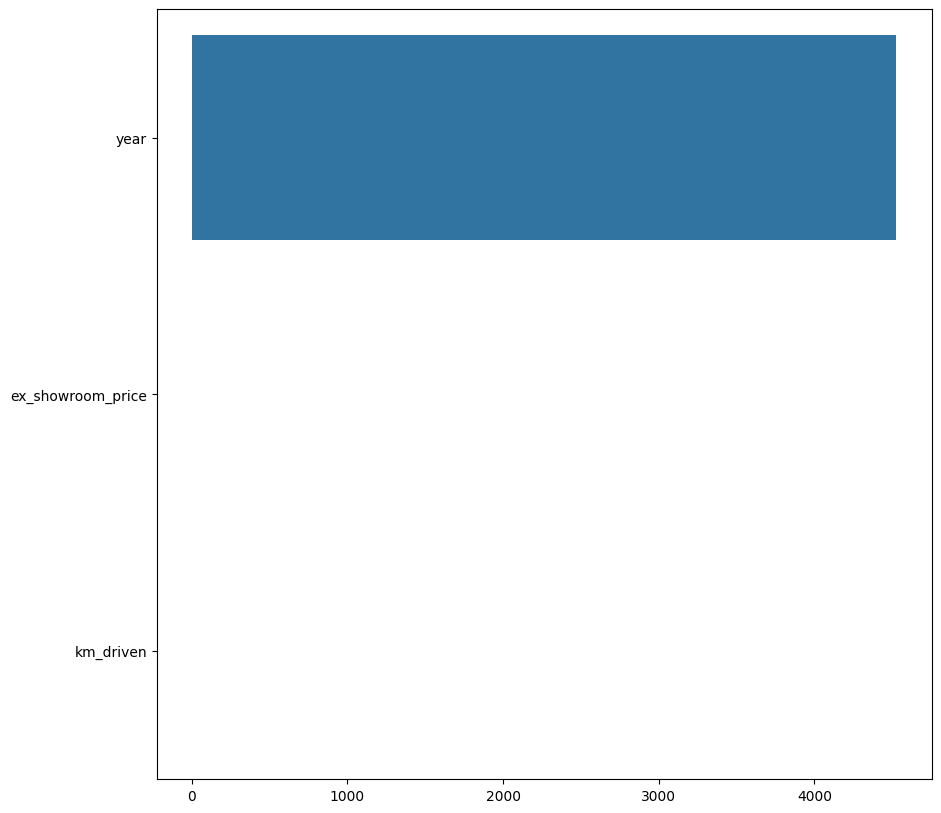

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train[numeric_features].std()), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

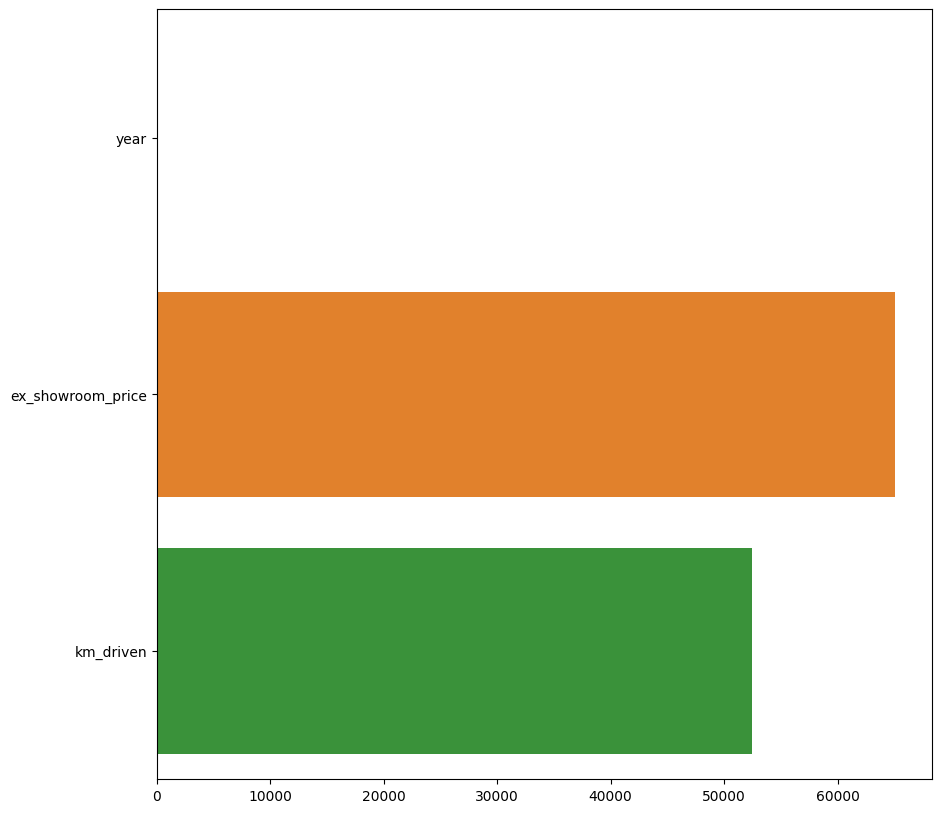

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 27048.6551
Train RMSE = 32953.6017


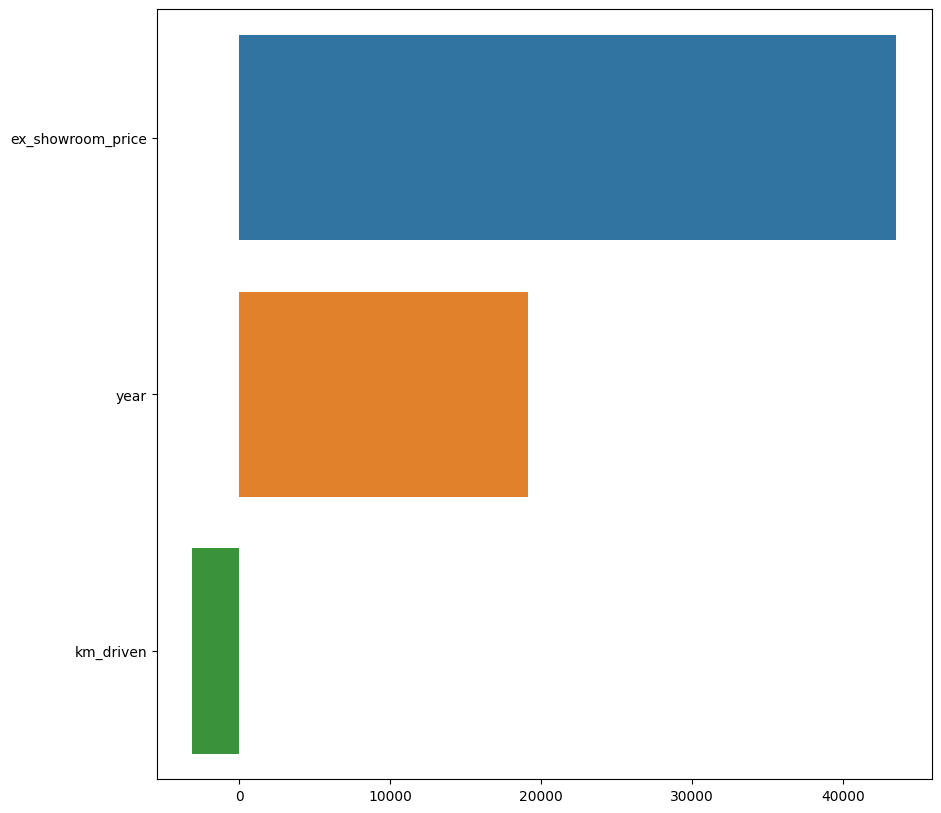

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

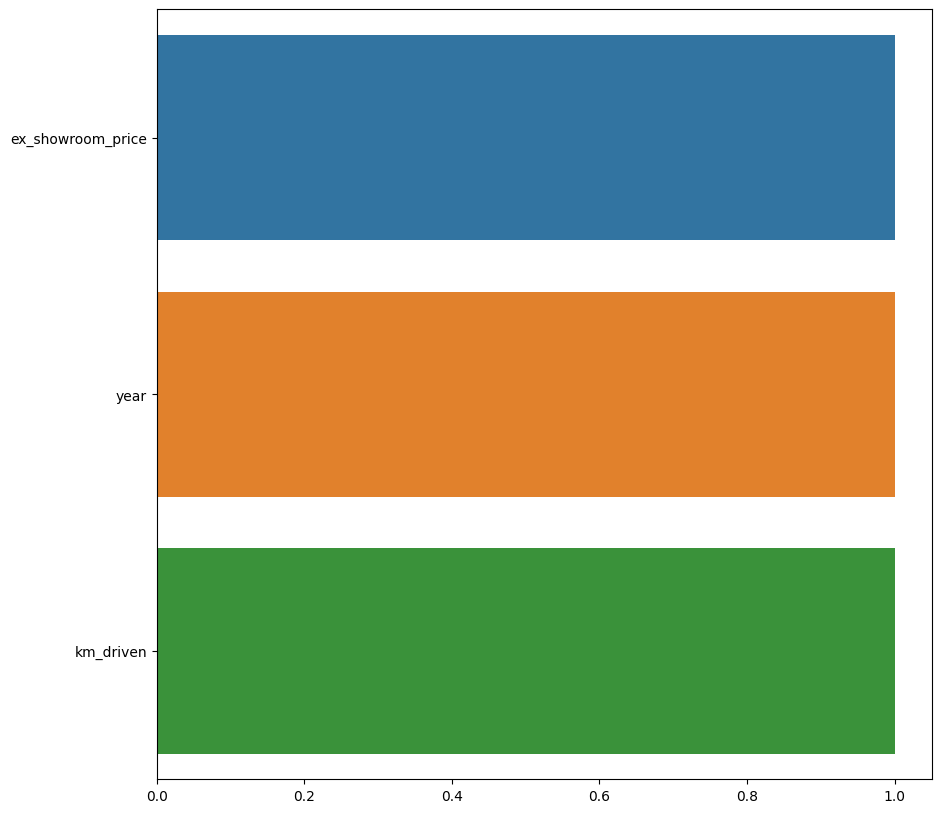

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()